In [1]:
import numpy as np 
import pandas as pd

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#evaluating
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#stopwords
from nltk.corpus import stopwords

#stemmer
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#tokenizer
from nltk.tokenize import word_tokenize

#vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import re
import string


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
/kaggle/input/fake-news-indonesia/Data_uji.csv
/kaggle/input/fake-news-indonesia/Data_latih.csv
/kaggle/input/tambahan-data-news/600 news with valid hoax label.csv
/kaggle/input/tambahan-data-news/manual_whatsapp_dataset.csv
/kaggle/input/tambahan-data-news/cekfakta_dataset.csv


In [2]:
data1 = pd.read_csv('/kaggle/input/tambahan-data-news/600 news with valid hoax label.csv', encoding='cp1252', sep=";")

In [3]:
data2 = pd.read_csv('/kaggle/input/tambahan-data-news/manual_whatsapp_dataset.csv')

In [4]:
data3 = pd.read_csv('/kaggle/input/fake-news-indonesia/Data_latih.csv')

In [5]:
print(data1.info())
#melihat values tagging
print(data1['tagging'].unique())
data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   600 non-null    object
 1   tagging  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
None
['Valid' 'Hoax']


,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid
...,...,...
595,Kabar yang beredar seputar rencana kenaikan ga...,Valid
596,Kabar yang beredar seputar rencana kenaikan ga...,Valid
597,"Akhir-akhir ini, beredar pemberitaan yang meny...",Valid
598,Rancangan peraturan pemerintah (RPP) tentang G...,Valid


In [6]:
data1['tagging'] = data1['tagging'].map(lambda x: 0 if x =='Valid' else 1)

In [7]:
data1.columns = ['news', 'is_fake']
data1

,news,is_fake
0,"Jakarta, Di jejaring sosial, banyak beredar in...",0
1,Isu bahwa ikan lele mengandung sel kanker di j...,0
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,0
3,Ikan lele merupakan salah satu makanan favorit...,0
4,Ikan lele merupakan bahan makanan yang cukup p...,0
...,...,...
595,Kabar yang beredar seputar rencana kenaikan ga...,0
596,Kabar yang beredar seputar rencana kenaikan ga...,0
597,"Akhir-akhir ini, beredar pemberitaan yang meny...",0
598,Rancangan peraturan pemerintah (RPP) tentang G...,0


In [8]:
print(data2.info())
data2 = data2.dropna()

data2 = data2.loc[:, ['teks', 'label']]
data2['label'] =  data2['label'].map(lambda x: 0 if (x.lower() =='valid') | (x.lower() == 'benar') else 1)
data2.columns = ['news', 'is_fake']
data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   teks        64 non-null     object
 1   label       62 non-null     object
 2   berantai    63 non-null     object
 3   topik       61 non-null     object
 4   Unnamed: 4  35 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB
None


,news,is_fake
0,Kalau ada yg kena covid tidak perlu panik dan ...,1
1,">> Just Info Goeess,...💪🏼💪🏼\nBisa di share ke ...",0
2,"""Saya lagi buat group What'sApp ""INFO SEPUTAR ...",1
3,"""dr Siti Fadillah, dokter jantung dan mantan m...",1
5,Innalillahi wa innaillaihi roojiuun.... \n\nKi...,1
6,Bismillahirrohmanirrohim...\nAssalamualaikum W...,1
7,Bismillah\n\n*Tolong viralkan seluruh grup-WA ...,1
8,Share dari Ketua Satgas Covid Pak Dwiyono\n\nI...,1
9,ANDA SUDAH BERUSIA LEBIH 50 TAHUN??\n\nJalan k...,1
10,Buat temen2 yg aku sayangi… Saya hanya meng in...,1


In [9]:
#cek label berita dari data3

data3 = data3.dropna()

data3.info()
def join_judul_narasi(row):
    row['narasi'] = row['judul'] + " "+ row['narasi']
    return row

data3.apply(join_judul_narasi, axis = "columns")
data3 = data3.loc[:, ['narasi', 'label']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4231 non-null   int64 
 1   label             4231 non-null   int64 
 2   tanggal           4231 non-null   object
 3   judul             4231 non-null   object
 4   narasi            4231 non-null   object
 5   nama file gambar  4231 non-null   object
dtypes: int64(2), object(4)
memory usage: 198.5+ KB


In [10]:
data3.columns = ['news', 'is_fake']
data3

,news,is_fake
0,A caller to a radio talk show recently shared ...,1
1,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1
2,Jokowi adalah presiden terbaik dlm sejarah ban...,1
3,"Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1
4,Kadrun kalo lihat foto ini panas dingin . .,1
...,...,...
4226,KPK Dilarang Membawa Brimob Bersenjata Masuk G...,1
4227,Jangan mau dialihkan kepada pakaian adat… FOKU...,1
4228,Akhir nya bisa terkenal bang denny,1
4229,Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat...,1


In [11]:
data = pd.concat([data1, data2, data3])
data

,news,is_fake
0,"Jakarta, Di jejaring sosial, banyak beredar in...",0
1,Isu bahwa ikan lele mengandung sel kanker di j...,0
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,0
3,Ikan lele merupakan salah satu makanan favorit...,0
4,Ikan lele merupakan bahan makanan yang cukup p...,0
...,...,...
4226,KPK Dilarang Membawa Brimob Bersenjata Masuk G...,1
4227,Jangan mau dialihkan kepada pakaian adat… FOKU...,1
4228,Akhir nya bisa terkenal bang denny,1
4229,Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat...,1


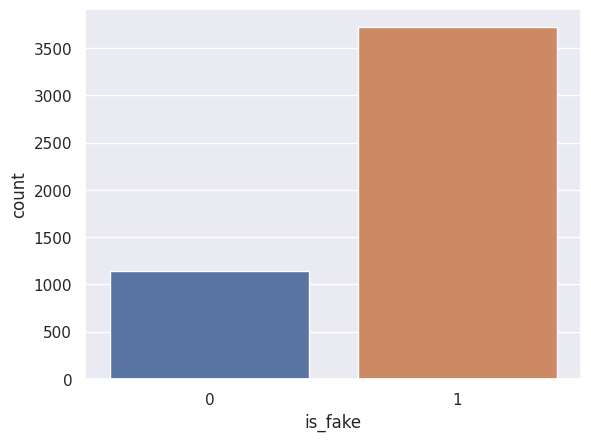

In [12]:
sns.countplot(data = data, x = data['is_fake']);

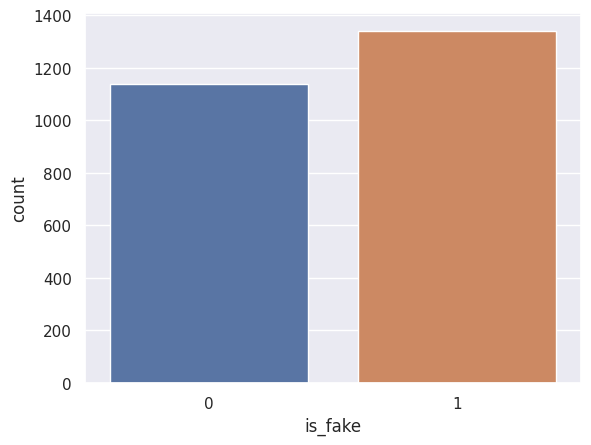

In [13]:
#agar jumlah data is_fake 0 dan 1 lebih balance
fake = data[data['is_fake'] == 1].sample(frac=1, random_state = 17)
real = data[data['is_fake'] == 0]
data = pd.concat([real, fake[:len(real) + 200]])

sns.countplot(data = data, x = data['is_fake']);

In [14]:
def clean(text):
   # Lowercase text
    text = text.lower()
    
    # Remove non-alphabetic and non-digit characters
    text = re.sub(r'[^a-z]', ' ', text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(text):
    stop_words =  set(stopwords.words('indonesian'))
    word_tokens_no_stopwords = [w for w in text if not w in stop_words]
    return word_tokens_no_stopwords

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [15]:
data.info()
data.reset_index(inplace=True, drop=True)
data

<class 'pandas.core.frame.DataFrame'>
Index: 2480 entries, 0 to 900
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   news     2480 non-null   object
 1   is_fake  2480 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.1+ KB


,news,is_fake
0,"Jakarta, Di jejaring sosial, banyak beredar in...",0
1,Isu bahwa ikan lele mengandung sel kanker di j...,0
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,0
3,Ikan lele merupakan salah satu makanan favorit...,0
4,Ikan lele merupakan bahan makanan yang cukup p...,0
...,...,...
2475,Pokemon berarti “aku yahudi”. Demikian broadca...,1
2476,Terjadi lagi pembunuhan terhadap Muadzin…..\n ...,1
2477,US Government Funded Insect Spy Drone and Alre...,1
2478,Iring2ngan Suku BADUI Berangkat Kejakarta Tanp...,1


In [16]:
data['news'] = data['news'].apply(clean)
data

,news,is_fake
0,jakarta di jejaring sosial banyak beredar info...,0
1,isu bahwa ikan lele mengandung sel kanker di j...,0
2,bagi penikmat kuliner dengan bahan dasar ikan ...,0
3,ikan lele merupakan salah satu makanan favorit...,0
4,ikan lele merupakan bahan makanan yang cukup p...,0
...,...,...
2475,pokemon berarti aku yahudi demikian broadcast ...,1
2476,terjadi lagi pembunuhan terhadap muadzin inali...,1
2477,us government funded insect spy drone and alre...,1
2478,iring ngan suku badui berangkat kejakarta tanp...,1


In [17]:
data['news'] = data['news'].apply(stem)
data

,news,is_fake
0,jakarta di jejaring sosial banyak edar informa...,0
1,isu bahwa ikan lele kandung sel kanker di jeja...,0
2,bagi nikmat kuliner dengan bahan dasar ikan le...,0
3,ikan lele rupa salah satu makan favorit di ind...,0
4,ikan lele rupa bahan makan yang cukup populer ...,0
...,...,...
2475,pokemon arti aku yahudi demikian broadcast yan...,1
2476,jadi lagi bunuh hadap muadzin inalillahi almar...,1
2477,us government funded insect spy drone and alre...,1
2478,iring ngan suku badui berangkat kejakarta tanp...,1


In [18]:
data

,news,is_fake
0,jakarta di jejaring sosial banyak edar informa...,0
1,isu bahwa ikan lele kandung sel kanker di jeja...,0
2,bagi nikmat kuliner dengan bahan dasar ikan le...,0
3,ikan lele rupa salah satu makan favorit di ind...,0
4,ikan lele rupa bahan makan yang cukup populer ...,0
...,...,...
2475,pokemon arti aku yahudi demikian broadcast yan...,1
2476,jadi lagi bunuh hadap muadzin inalillahi almar...,1
2477,us government funded insect spy drone and alre...,1
2478,iring ngan suku badui berangkat kejakarta tanp...,1


In [19]:
data.to_csv('stemmed_data.csv', index = False)

In [20]:
!pip install indoNLP
import indoNLP.preprocessing
data['news'] = data['news'].map(lambda row: indoNLP.preprocessing.remove_html(row))
data['news'] = data['news'].map(lambda row: indoNLP.preprocessing.remove_url(row))
data['news'] = data['news'].map(lambda row: indoNLP.preprocessing.replace_slang(row))
data['news'] = data['news'].map(lambda row: indoNLP.preprocessing.replace_word_elongation(row))
data['news'] = data['news'].map(lambda row: indoNLP.preprocessing.remove_stopwords(row))
data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.0 MB/s eta 0:00:00


,news,is_fake
0,jakarta jejaring sosial edar informasi lel...,0
1,isu ikan lele kandung sel kanker jejaring so...,0
2,nikmat kuliner bahan dasar ikan lele berita ...,0
3,ikan lele rupa salah makan favorit indonesia...,0
4,ikan lele rupa bahan makan populer indonesi...,0
...,...,...
2475,pokemon arti yahudi broadcast edar media s...,1
2476,bunuh hadap muadzin inalillahi almarhum bahro...,1
2477,us government funded insect drone and already...,1
2478,iring ngan suku badui berangkat kejakarta ala...,1


In [21]:
data.to_csv('clean_data.csv', index=False)

In [22]:
import nltk
tokenized_data = data.copy()
tokenized_data['news'] = data['news'].apply(tokenize)
combined_news_fake = sum(tokenized_data[tokenized_data['is_fake']==1].loc[:, 'news'], [])
combined_news_real = sum(tokenized_data[tokenized_data['is_fake']==0].loc[:, 'news'], [])
frequency_dist_fake = nltk.FreqDist(combined_news_fake)
frequency_dist_real = nltk.FreqDist(combined_news_real)

In [23]:
sorted(frequency_dist_fake,key=frequency_dist_fake.__getitem__, reverse=True)[0:50]

['orang',
 'indonesia',
 'laku',
 'anak',
 'presiden',
 'negara',
 'nyata',
 'ya',
 'gaji',
 'facebook',
 'rp',
 'pokemon',
 'salah',
 'bulu',
 'jokowi',
 'perintah',
 'lihat',
 'babi',
 'bakar',
 'masuk',
 'sikat',
 'hasil',
 'media',
 'iphone',
 'covid',
 'jakarta',
 'islam',
 'virus',
 'kerja',
 'info',
 'hati',
 'corona',
 'juta',
 'jalan',
 'tinggal',
 'bahasa',
 'informasi',
 'allah',
 'rupa',
 'dunia',
 'nama',
 'kota',
 'menteri',
 'berita',
 'tutup',
 'kuas',
 'stroke',
 'foto',
 'the',
 'sakit']

In [24]:
sorted(frequency_dist_real,key=frequency_dist_real.__getitem__, reverse=True)[0:50]

['lele',
 'laku',
 'ikan',
 'indonesia',
 'orang',
 'edar',
 'media',
 'pokemon',
 'masjid',
 'presiden',
 'facebook',
 'tahan',
 'sosial',
 'informasi',
 'berita',
 'kabar',
 'salah',
 'bulu',
 'nyata',
 'kandung',
 'permen',
 'sikat',
 'iphone',
 'stroke',
 'bakar',
 'istiqlal',
 'rupa',
 'masuk',
 'milik',
 'aksi',
 'hasil',
 'arti',
 'babi',
 'hoax',
 'reog',
 'kait',
 'terima',
 'gaji',
 'traveloka',
 'makan',
 'kena',
 'gigi',
 'masyarakat',
 'jakarta',
 'bristle',
 'sel',
 'davao',
 'isu',
 'tugas',
 'sebar']

In [25]:
df_train = data.copy()
df_train = df_train.sample(frac=1, random_state=17).reset_index(drop=True)
df_train

,news,is_fake
0,kkn ugm jokowi sembilan dosen menteri jaga ...,1
1,mahasiswa harga dosen orang tua dosen o...,1
2,game pokemon go marak kalang anak muda ...,1
3,foto bicara prof hj sylviana murni habib riz...,0
4,masuk indonesia via manado pax positif virus ...,1
...,...,...
2475,mayat mamak palsu jokowi kagak terima bumi pas...,1
2476,stroke kambuh prabowo batal orasi politik aca...,1
2477,emosi dominasi politik,0
2478,astaga sholat,1


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

X, y = df_train.news, df_train.is_fake

pipe = Pipeline(
    [
        ("vectorizer", TfidfVectorizer()),
        ("classifier", SVC(probability=True, random_state=17)),
    ],
    verbose=True,
)


n_splits = 2
cv = StratifiedKFold(n_splits=n_splits, random_state=17, shuffle=True)

scoring = "accuracy"

scores = cross_val_score(pipe, X, y, scoring=scoring, cv=cv)
print(f"{scoring}: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.0s
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.9s
accuracy: 0.69 (+/- 0.01)
